In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('C:/Users/allen/Desktop/4523 Project/cleaned_data.csv')

In [3]:
skills_df = pd.read_csv('skills.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      8950 non-null   int64  
 1   company_id                  8950 non-null   int64  
 2   remote_allowed              8950 non-null   int64  
 3   currency                    8950 non-null   object 
 4   sponsored                   8950 non-null   int64  
 5   formatted_work_type         8950 non-null   object 
 6   formatted_experience_level  8950 non-null   object 
 7   title                       8950 non-null   object 
 8   application_type            8950 non-null   object 
 9   skill_abr                   8950 non-null   object 
 10  industry_name               8944 non-null   object 
 11  pay_period                  8950 non-null   object 
 12  yearly_salary               8950 non-null   float64
 13  name                        8950 

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def clean_text(text):
    text = text.lower()
    text = nltk.RegexpTokenizer(r"\w+").tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

In [7]:
df['cleaned_job_description'] = df['combined_description'].apply(clean_text)

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [9]:
custom_stop_words = [
    'status', 'state', 'limit', 'sexual', 'regard', 'customer', 'dental',
    'local', 'race', 'functional', 'national', 'environment', 'experience',
    'bachelor', 'job', 'identity', 'practice', 'including', 'external', 'www',
    'com', 'team', 'employer', 'without', 'salary', 'range', 'member', 'color',
     'http', 'york', 'cross', 'veteran', 'fast', 'employee', 'vision',
    'project', 'reasonable', 'opportunity', 'religion', 'orientation',
    'long', 'term', 'management', 'year', 'new', 'equal', 'applicant',
    'accommodation', 'paced', 'description', 'qualified', 'marital',
    'work', 'internal', 'gender','sex','e','g','time','disability',
    'accordance', 'able', 'ability', 'access', 'age', 'accounts', 'act',
    'above','actual','after','across','also','along','active','additional',
    'address','across','accurate','actions','accuracy','ad','addition','account',
    'action','achieve','accommodations','administrative','administration','advanced',
    'strategy','maximum','eeo','solved','reflects','regardless','hour',
    'scale','area', 'group', 'code', 'usa', 'like', 'ca', 'pre', 
    'learn', 'nurse', 'point', 'home'
]

combined_stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=combined_stop_words) 
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_job_description'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans

In [12]:
joined_table = df.merge(skills_df, on='skill_abr', how='left')

In [13]:
def combine_full_skill_names(row, abr_col_name, skills_dict):
    split_abrs = row[abr_col_name].split('_')
    full_skill_names = [skills_dict.get(abr, abr) for abr in split_abrs]
    combined_full_names = '_'.join(full_skill_names)
    return combined_full_names

skills_dict = pd.Series(skills_df.skill_name.values, index=skills_df.skill_abr).to_dict()

joined_table['combined_skill_names'] = joined_table.apply(
    lambda row: combine_full_skill_names(row, 'skill_abr', skills_dict), axis=1)

joined_table.head()


,job_id,company_id,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type,skill_abr,industry_name,pay_period,yearly_salary,name,employee_count,follower_count,combined_description,cleaned_job_description,skill_name,combined_skill_names
0,3757940104,553718,0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply,OTHR,Medical Equipment Manufacturing,YEARLY,63000.0,HearingLife,1171,11417,Overview\n\nHearingLife is a national hearing ...,overview hearinglife national hearing care com...,Other,Other
1,3757938018,18213359,0,USD,0,Full-time,Entry level,Cook,OffsiteApply,MGMT_MNFC,Non-profit Organizations,YEARLY,46321.6,Episcopal Communities & Services,36,305,descriptionTitle\n\n Looking for a great oppor...,descriptiontitle looking great opportunity dev...,NaN,Management_Manufacturing
2,3757937095,437225,1,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply,IT,"Retail_Manufacturing_Technology, Information a...",YEARLY,240895.0,"iHerb, LLC",1260,51651,"Job Summary\nAt iHerb, we are on a mission to ...",job summary iherb mission make health wellness...,Information Technology,Information Technology
3,3757936097,18213359,0,USD,0,Full-time,Entry level,Dishwasher,OffsiteApply,MGMT_MNFC,Non-profit Organizations,YEARLY,40144.0,Episcopal Communities & Services,36,305,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",descriptiontitle 2 000 sign bonus guaranteed l...,NaN,Management_Manufacturing
4,3757935381,19181907,1,USD,0,Full-time,Entry level,Insights Analyst - Auto Industry,OffsiteApply,RSCH_ANLS_IT,Market Research,YEARLY,61000.0,Escalent,894,72044,Who We Are\n\nEscalent is an award-winning dat...,escalent award winning data analytics advisory...,NaN,Research_Analyst_Information Technology


In [14]:
import re
unique_skills = set(joined_table['combined_skill_names'].dropna().unique())

skills_dic = {}

for skill in unique_skills:
    pattern = r'\b' + re.escape(skill.lower()) + r'\b'
    skills_dic[skill] = joined_table['combined_skill_names'].str.contains(pattern, case=False, na=False).astype(int)

skill_frequencies = {skill: values.sum() for skill, values in skills_dic.items()}



In [15]:
skill_frequencies

{'Customer Service_Health Care Provider': 2,
 'Business Development_Sales_Engineering': 1,
 'Health Care Provider_Administrative_Management': 1,
 'General Business_Administrative_Other': 1,
 'Analyst_Accounting/Auditing_Other': 2,
 'Consulting_Strategy/Planning_Finance': 1,
 'Administrative_Project Management_Business Development': 1,
 'Writing/Editing_Information Technology': 1,
 'Strategy/Planning_Analyst_Supply Chain': 1,
 'Human Resources_Training_Management': 1,
 'Finance_Engineering_General Business': 1,
 'Science_Health Care Provider': 1,
 'Management_Strategy/Planning_General Business': 3,
 'Information Technology_Accounting/Auditing_Finance': 1,
 'Administrative': 215,
 'Management_Purchasing_Supply Chain': 2,
 'Administrative_Strategy/Planning_Human Resources': 1,
 'Engineering_Manufacturing_Project Management': 3,
 'Consulting_Quality Assurance_Training': 1,
 'Administrative_Human Resources_Sales': 1,
 'Marketing_Advertising_Strategy/Planning': 1,
 'Finance_Engineering_Infor

### Grouped Skill Wordcloud(Use)

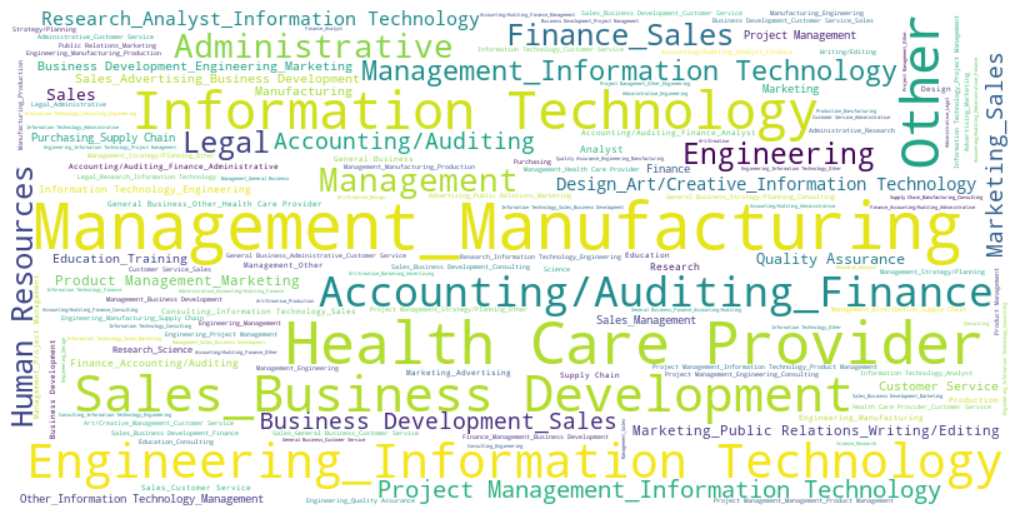

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')  
plt.tight_layout(pad=0)  
plt.show()

### Random Forest Model(Use)

In [17]:
tfidf_vectorizer_rf = TfidfVectorizer(max_features=1000, stop_words=combined_stop_words) 
X = tfidf_vectorizer_rf.fit_transform(df['cleaned_job_description'])

salary_threshold = np.percentile(df['yearly_salary'], 80) 
y = (df['yearly_salary'] >= salary_threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

features = zip(feature_names, feature_importances)
sorted_features = sorted(features, key=lambda x: x[1], reverse=True)

print("Most indicative features for high salary:")
for feature, importance in sorted_features[:20]: 
    print(f"{feature}: {importance}")

Most indicative features for high salary:
strategic: 0.008883054127929696
director: 0.008868581373533019
stakeholder: 0.00823728099046667
leadership: 0.007668670057680068
cloud: 0.007301230059913581
equity: 0.006853376355276207
platform: 0.006837164441694218
lead: 0.006405831755678103
development: 0.006144534300467639
engineering: 0.005933824424068839
assigned: 0.0055606523394667465
service: 0.00554625774265663
technology: 0.0055406168339074855
business: 0.0054928254508729716
design: 0.005246191220440931
senior: 0.0051845258121350326
risk: 0.0046941720393785915
science: 0.004646424953124298
building: 0.004600336622408884
software: 0.004246891462712032


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

In [19]:
vectorizer_skill = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)
X_description = vectorizer_skill.fit_transform(joined_table['combined_description'])

joined_table['combined_skill_names'] = joined_table['combined_skill_names'].fillna('').astype(str)
joined_table['skills_list'] = joined_table['combined_skill_names'].apply(lambda x: x.split('_') if x else [])

# Identify the top 500 skills
all_skills = [skill for sublist in joined_table['skills_list'] for skill in sublist]
skill_counts = pd.Series(all_skills).value_counts()
top_skills = skill_counts.head(500).index.tolist() 

joined_table['skills_list'] = joined_table['skills_list'].apply(lambda skills: [skill for skill in skills if skill in top_skills])

mlb = MultiLabelBinarizer(sparse_output=True)
X_skills = mlb.fit_transform(joined_table['skills_list'])

salary_threshold = np.percentile(joined_table['yearly_salary'], 80)  
y = (joined_table['yearly_salary'] >= salary_threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_skills, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_
skills_feature_names = mlb.classes_
features_skills = zip(skills_feature_names, feature_importances)
sorted_features_skills = sorted(features_skills, key=lambda x: x[1], reverse=True)

print("Most indicative skills for high salary:")
top_10_skills = sorted_features_skills[:10]
for skill, importance in top_10_skills:
    print(f"{skill}: {importance}")

Most indicative skills for high salary:
Engineering: 0.07108239541087494
Advertising: 0.06671262651861433
Product Management: 0.06606793950335312
Information Technology: 0.058391498181879664
Business Development: 0.052422235275609165
Management: 0.04775572577434821
Manufacturing: 0.04465596776465726
Sales: 0.04283417001228761
Project Management: 0.04112812570693002
Strategy/Planning: 0.038815564791841624


### Cluster Classification(Use)

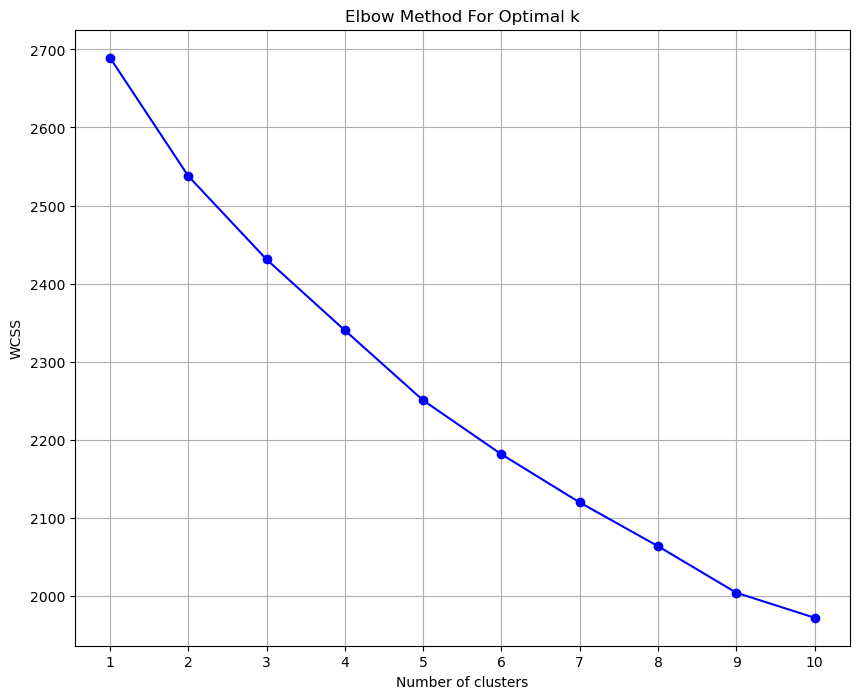

In [20]:
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(
    token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
    stop_words=combined_stop_words,
    max_df=0.6, 
    max_features=1000
)
stemmer = PorterStemmer()
joined_table['cleaned_description'] = joined_table['combined_description'].apply(
    lambda x: ' '.join(stemmer.stem(word) for word in x.split())
)
X_clustering = vectorizer.fit_transform(joined_table['combined_description'])

svd = TruncatedSVD(n_components=50, random_state=42)  
X_clustering_reduced = svd.fit_transform(X_clustering)

wcss = []
range_of_clusters = range(1, 11) 
for i in range_of_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_clustering_reduced)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 8))
plt.plot(range_of_clusters, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()


In [21]:
num_clusters = 5  

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_clustering_reduced)

joined_table['cluster'] = kmeans.labels_

C:\Users\allen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
print(joined_table[['combined_description', 'cluster']].head())
print(joined_table['cluster'].value_counts())

                                combined_description  cluster
0  Overview\n\nHearingLife is a national hearing ...        3
1  descriptionTitle\n\n Looking for a great oppor...        1
2  Job Summary\nAt iHerb, we are on a mission to ...        4
3  descriptionTitle\n\n $2,000 Sign-on Bonus Guar...        1
4  Who We Are\n\nEscalent is an award-winning dat...        4
1    3042
4    2798
2    1381
3     922
0     807
Name: cluster, dtype: int64


In [23]:
custom_stop_words = [
    'status', 'state', 'limit', 'sexual', 'regard', 'customer', 'dental',
    'local', 'race', 'functional', 'national', 'environment', 'experience',
    'bachelor', 'job', 'identity', 'practice', 'including', 'external', 'www',
    'com', 'team', 'employer', 'without', 'salary', 'range', 'member', 'color',
     'http', 'york', 'cross', 'veteran', 'fast', 'employee', 'vision',
    'project', 'reasonable', 'opportunity', 'religion', 'orientation',
    'long', 'term', 'management', 'year', 'new', 'equal', 'applicant',
    'accommodation', 'paced', 'description', 'qualified', 'marital',
    'work', 'internal', 'gender','sex','e','g','time','disability',
    'accordance', 'able', 'ability', 'access', 'age', 'accounts', 'act',
    'above','actual','after','across','also','along','active','additional',
    'address','across','accurate','actions','accuracy','ad','addition','account',
    'action','achieve','accommodations','administrative','administration','advanced',
    'always','according','about','against','any','affirmative','advance','advancement',
    'acquisition','application','applicants','activities','abilities','assist','ancestry',
    'apply','applications','assigned','applicable','among','assistance','areas','annual',
    'area','around','basis','balance','available','approach','award','approximately','assists',
    'america','applying','big','bonus','agencies','agency','appropriate','backgrounds','american',
    'based','s','skill','system','quality','people','life','required','data','solution','company',
    'process'
]
combined_stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def print_top_terms_per_cluster(feature_names, kmeans_model, n_terms=10):
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"Cluster {i}:")
        top_terms = [feature_names[ind] for ind in order_centroids[i, :n_terms]]
        print(", ".join(top_terms))

feature_names = vectorizer.get_feature_names_out()
print_top_terms_per_cluster(feature_names, kmeans, n_terms=10)

Cluster 0:
401k, accounting, according, acquisition, advancement, activities, advance, amazon, analyze, analytics
Cluster 1:
401k, accredited, according, abilities, accurately, activities, agile, advisory, agencies, agency
Cluster 2:
401k, accredited, accounting, actively, advance, advancement, ai, agency, applicable, analysis
Cluster 3:
abilities, 401k, accounting, advance, affirmative, acquisition, actively, analyst, analytical, american
Cluster 4:
401k, amazon, analysis, application, affirmative, american, agencies, appropriate, agency, applicable


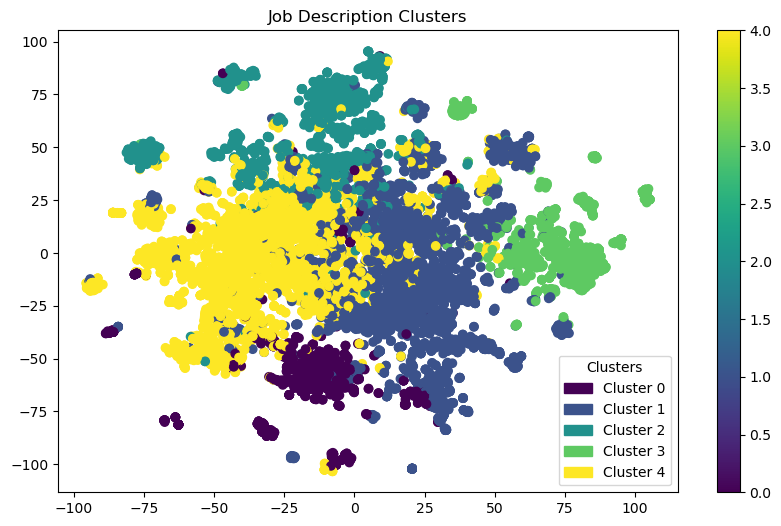

In [25]:
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_clustering_reduced)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.colorbar(scatter)
plt.title('Job Description Clusters')

unique_labels = np.unique(kmeans.labels_)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]

import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colors[i], label=f'Cluster {unique_labels[i]}') for i in range(len(unique_labels))]
plt.legend(handles=handles, title="Clusters")

plt.show()


### LDA

In [30]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = combined_stop_words

def preprocess(document):
    tokens = tokenizer.tokenize(document.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in joined_table['combined_description']]

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

num_topics = 4  
passes = 10  

lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

number_of_topics = lda_model.num_topics  

topics = []
for i in range(number_of_topics):
    topics.append(lda_model.show_topic(i, topn=10))  


for n, topic in enumerate(topics):
    print(f'Topic {n}: {topic}')


Topic 0: [('care', 0.016586866), ('health', 0.014023232), ('patient', 0.0119955875), ('service', 0.008282058), ('medical', 0.008131164), ('healthcare', 0.008112894), ('community', 0.007392917), ('program', 0.005945418), ('benefit', 0.0057011168), ('family', 0.0051853396)]
Topic 1: [('client', 0.011404209), ('service', 0.009450948), ('business', 0.007443007), ('skill', 0.006359928), ('support', 0.005796926), ('financial', 0.00541914), ('staffing', 0.005147884), ('professional', 0.0048918403), ('solution', 0.0046387054), ('year', 0.0046151197)]
Topic 2: [('service', 0.007904146), ('position', 0.006660393), ('equipment', 0.005667446), ('store', 0.0049673393), ('duty', 0.004872237), ('product', 0.0046988423), ('safety', 0.004681679), ('customer', 0.0046164375), ('employment', 0.0042405142), ('perform', 0.0037379093)]
Topic 3: [('business', 0.008692314), ('sale', 0.0074606324), ('product', 0.007441673), ('technology', 0.006168465), ('role', 0.0054723504), ('solution', 0.00503345), ('design'

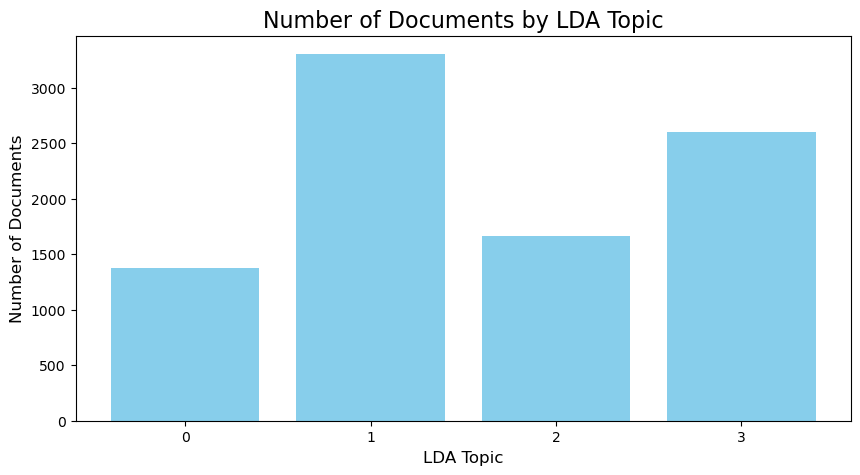

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

dominant_topics = []
for bow in corpus:
    topic_probs = lda_model.get_document_topics(bow)
    dominant_topic = sorted(topic_probs, key=lambda x: x[1], reverse=True)[0][0]
    dominant_topics.append(dominant_topic)

topic_counts = pd.Series(dominant_topics).value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel('LDA Topic', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.title('Number of Documents by LDA Topic', fontsize=16)
plt.xticks(topic_counts.index)
plt.show()
